# Project Statement:

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. We want to train a car price prediction model.

# Objective:

Your task is to train a machine learning model that can learn from the data set and predict the car price.

### Tasks:
    
1. Importing Libraries 
2. Reading dataset
3. Understanding the dataset
     info, shape, unique, value_counts, describe
4. Null values, dublicates
5. Skewness and distribution
7. Visualization
    distplot, pairplot, countplot, boxplot
8. Outliers
9. get dummies
10. train the model
11. test the model
----------------------

# Importing Libraries:

In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

# Reading the Dataset:

In [58]:
data = pd.read_csv(r"C:\Users\user\Desktop\car data.csv")

In [59]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Analysis

### Information:

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Shape:

In [61]:
data.shape

(301, 9)

### Unique Values: 

In [62]:
for i in data.columns:
    print (i , ":", data[i].unique())
    print (" _ "*40)

Car_Name : ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' '

### Value Counts:

In [13]:
for i in data.columns:
    print (i , ":\n", data[i].value_counts())
    print (" _ "*40)

Car_Name :
 city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
Year :
 2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
Selling_Price :
 0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Pri

### Observations:
  - no unique columns, all features seem to be usable except for Car_Name
  - both numerical and categoricl data are present, we will need to split them and deal with each separately
  - numerical: we will need feature scaling
  - categorical: get dummies
  - linear regression
  - Owner == 3 , Fuel_Type = CNG seem to be unique, but we will keep them 

# Missing Values:

In [63]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### Observation:
- No missing values present in the dataset

# Duplicated Values:

In [64]:
data.duplicated().sum()

2

### Dropping Duplicates:

In [65]:
data.drop_duplicates(inplace=True)

In [66]:
data.duplicated().sum()

0

### Describtion of numerical data

In [68]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Skewness of numerical data

In [69]:
data.skew(axis = 0)

Year            -1.236876
Selling_Price    2.536522
Present_Price    4.189255
Driven_kms       6.418134
Owner            7.590605
dtype: float64

### Plotting distribution and skewness for numerical data

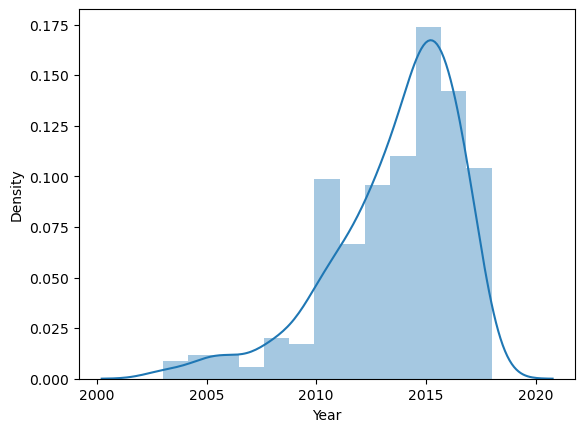

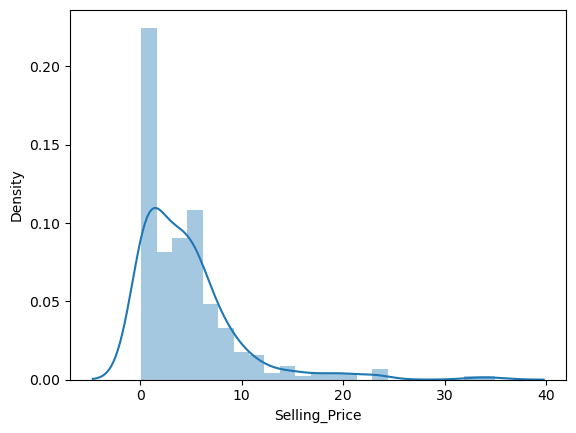

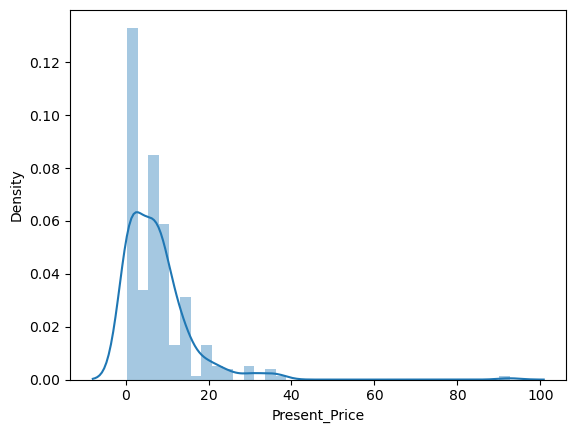

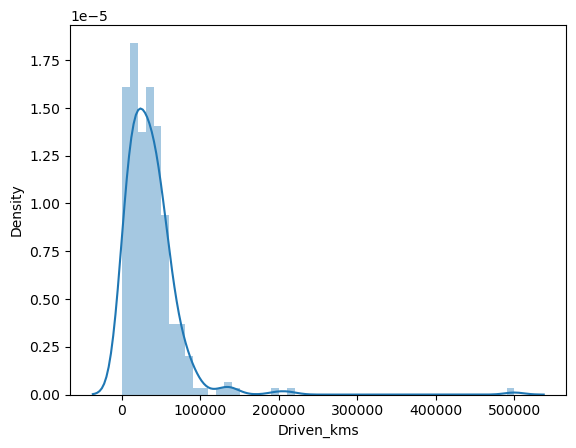

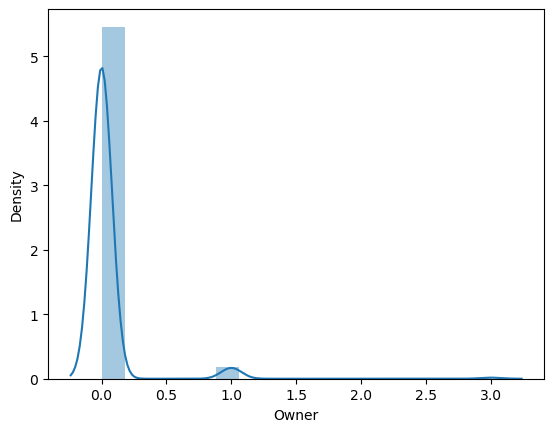

In [72]:
num_data = data.select_dtypes(include = 'number')
for col in num_data:
    sns.distplot(num_data[col])
    plt.show()

### Observations:
- non of the features is normally distributed

### Pairplot for density for numerical data

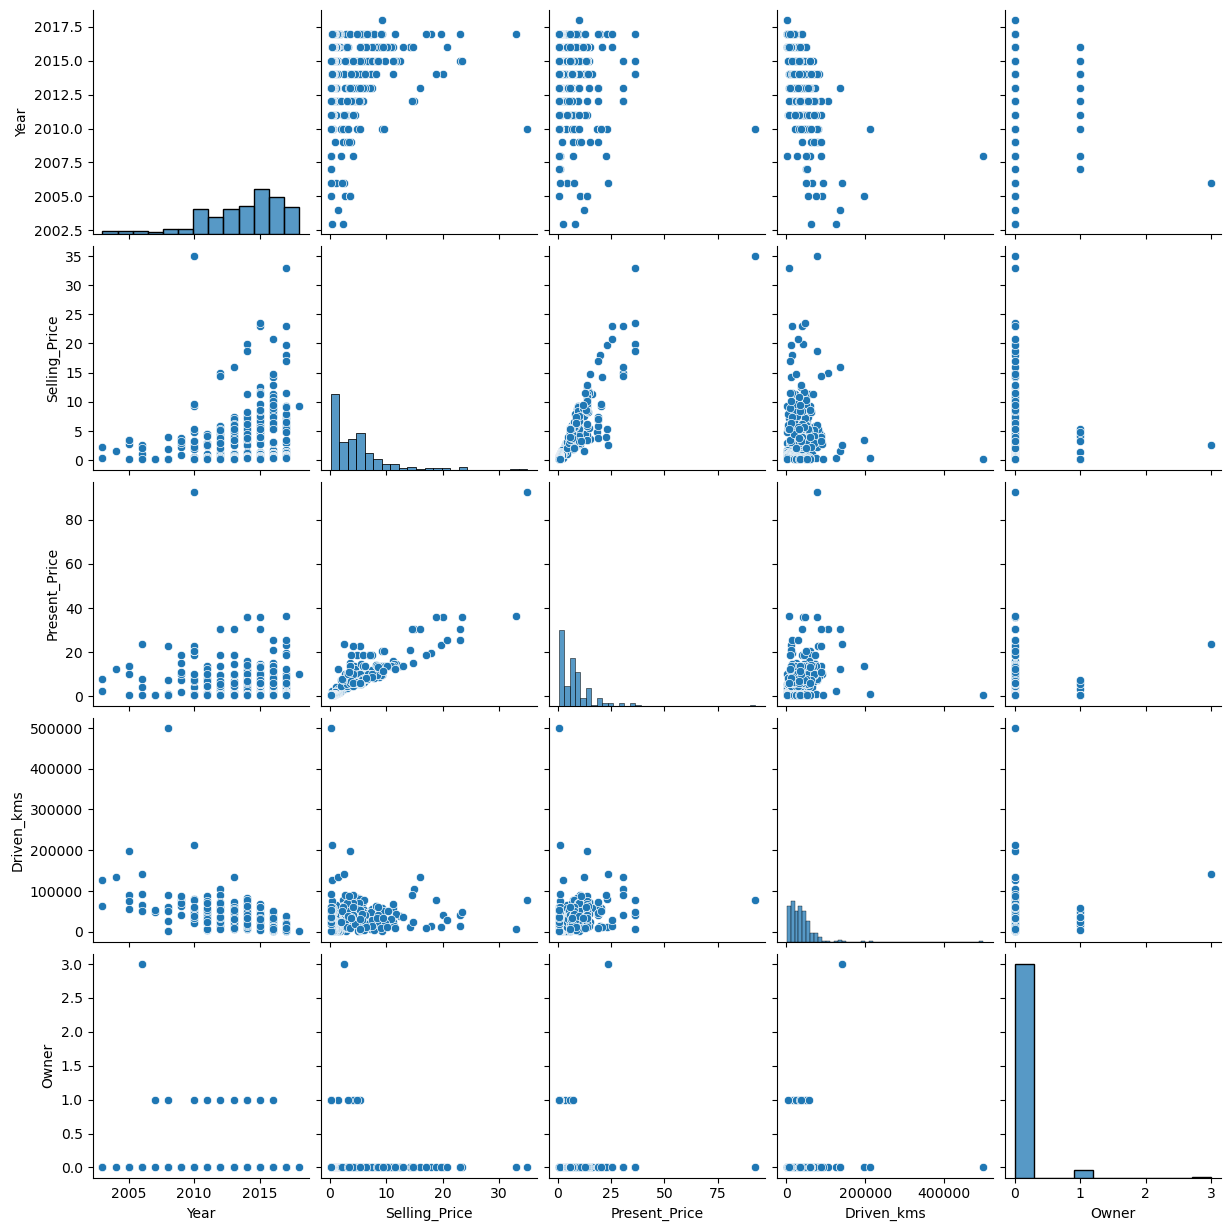

In [73]:
sns.pairplot(data)
plt.show()

### Count plot

#### Car_Name

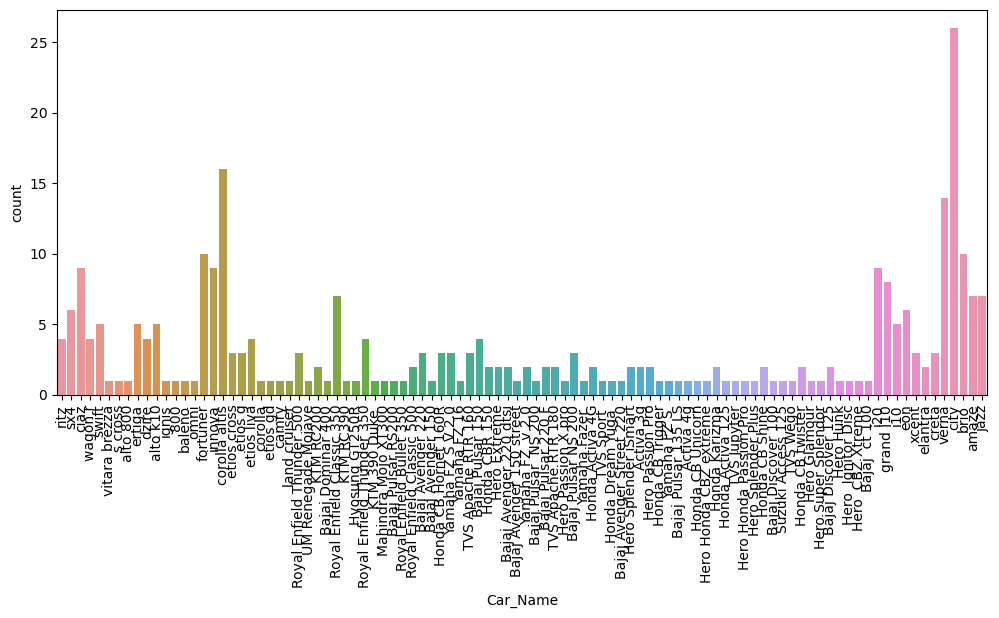

In [91]:
plt.figure(figsize=(12,5))
sns.countplot(data['Car_Name'])
plt.xticks(rotation = 90)
plt.show()

#### Year

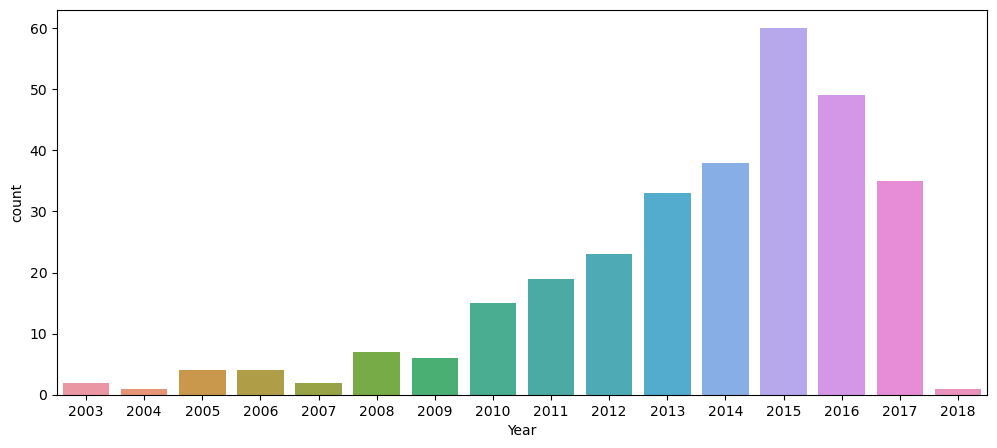

In [90]:
plt.figure(figsize = (12,5))
sns.countplot(data['Year'])
plt.show()

#### Fuel_Type

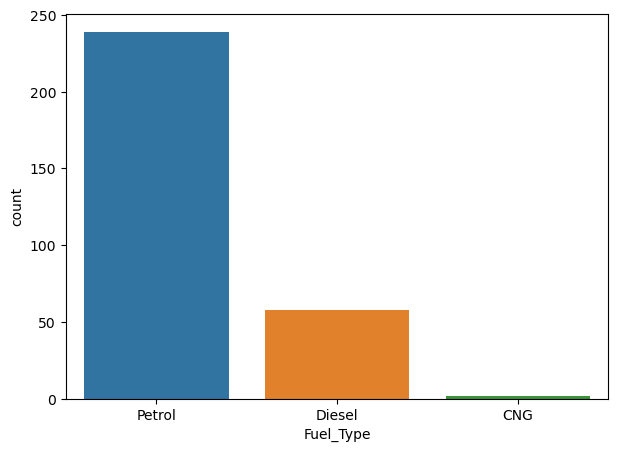

In [89]:
plt.figure(figsize = (7,5))
sns.countplot(data['Fuel_Type'])
plt.show()

### Selling_type

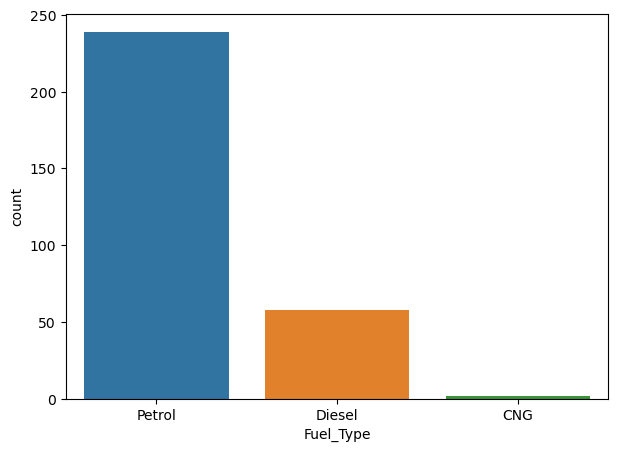

In [259]:
plt.figure(figsize = (7,5))
sns.countplot(data['Fuel_Type'])
plt.show()

### Transmission

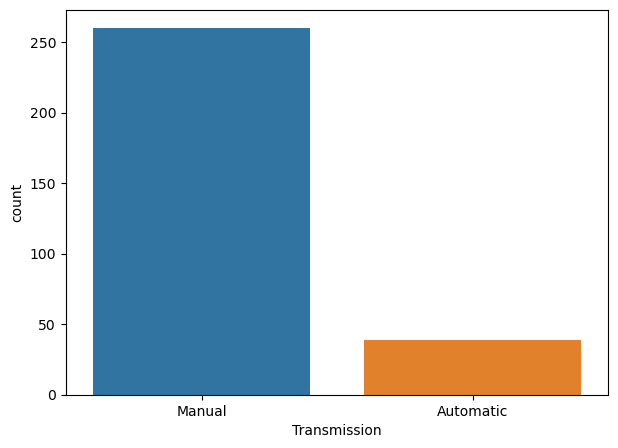

In [93]:
plt.figure(figsize = (7,5))
sns.countplot(data['Transmission'])
plt.show()

### Owner

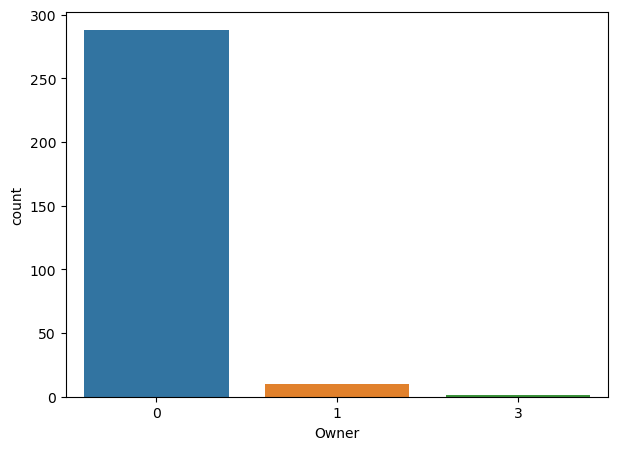

In [94]:
plt.figure(figsize = (7,5))
sns.countplot(data['Owner'])
plt.show()

### Box plot for outliers

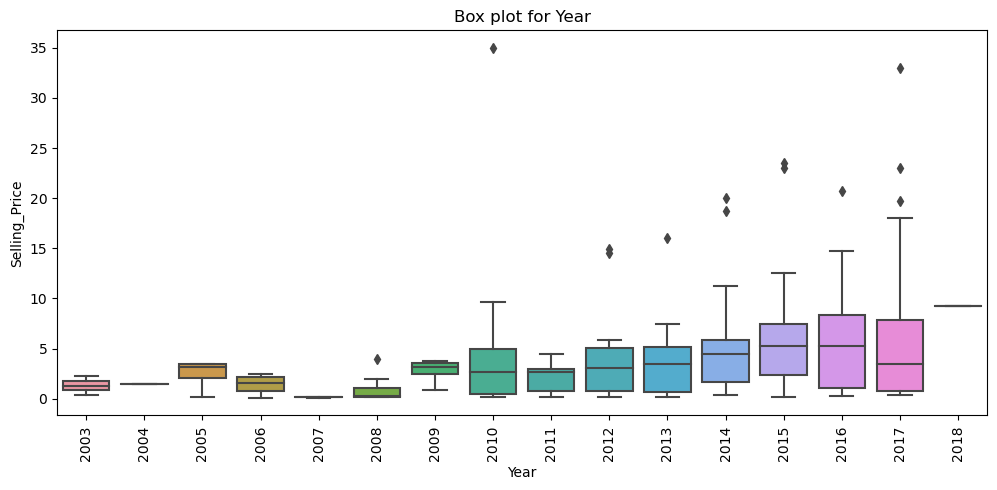

In [107]:
plt.figure(figsize=(12,5))
sns.boxplot(y = data['Selling_Price'], x = data['Year']).set_title('Box plot for Year')
plt.xticks(rotation = 90)
plt.show()

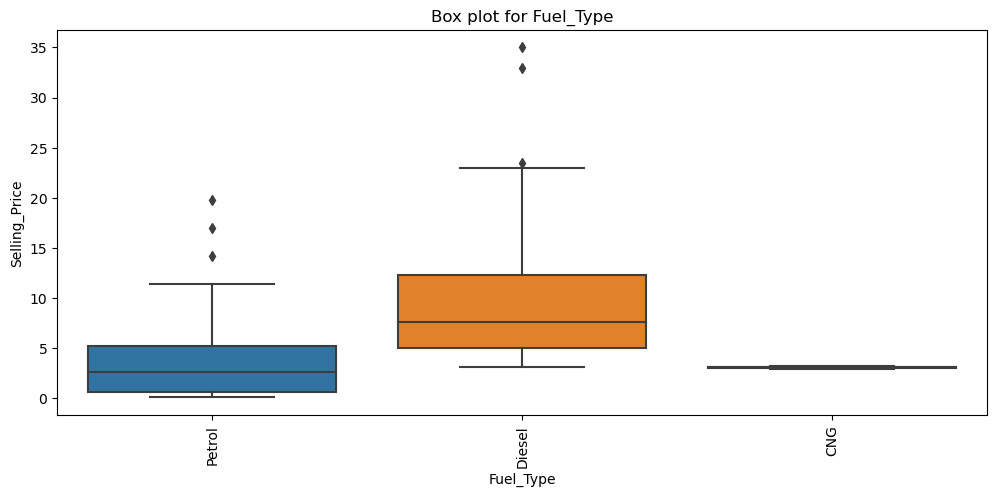

In [108]:
plt.figure(figsize=(12,5))
sns.boxplot(y = data['Selling_Price'], x = data['Fuel_Type']).set_title('Box plot for Fuel_Type')
plt.xticks(rotation = 90)
plt.show()

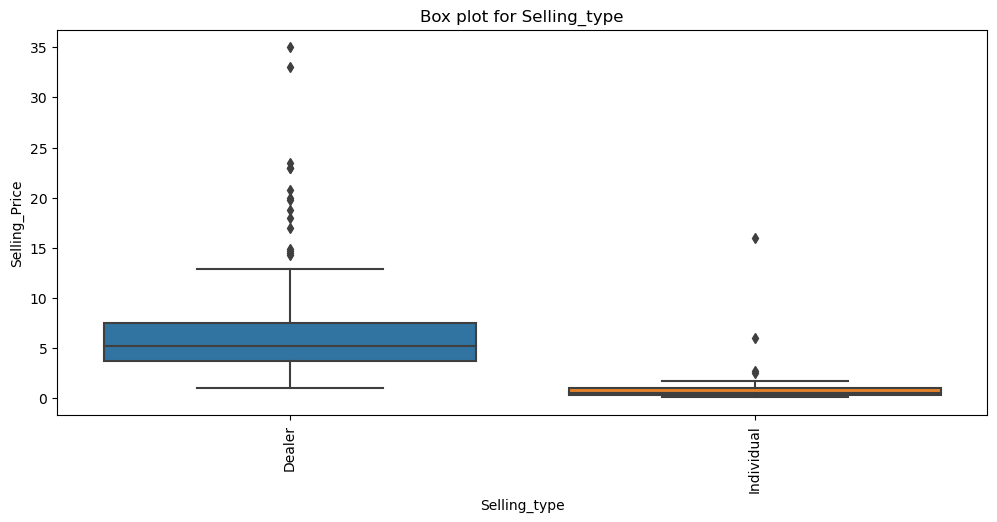

In [109]:
plt.figure(figsize=(12,5))
sns.boxplot(y = data['Selling_Price'], x = data['Selling_type']).set_title('Box plot for Selling_type')
plt.xticks(rotation = 90)
plt.show()

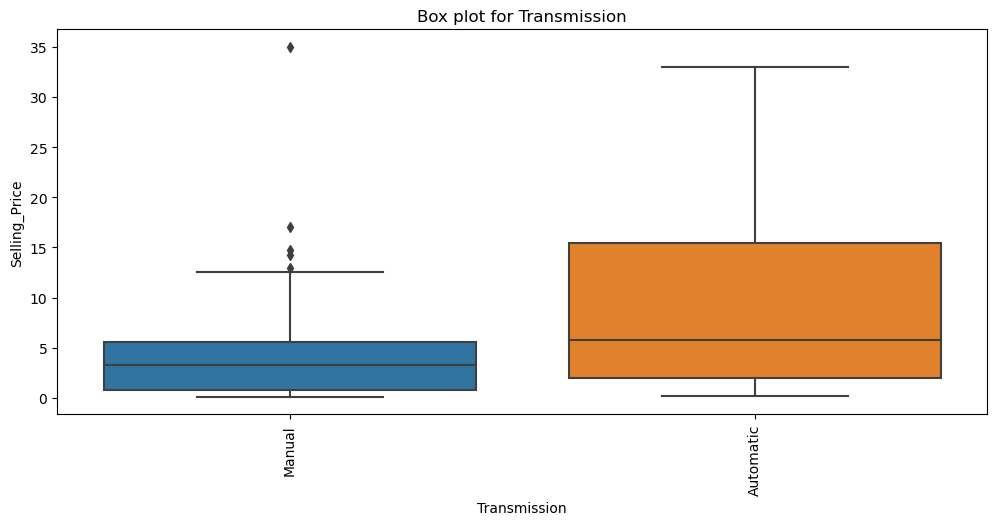

In [110]:
plt.figure(figsize=(12,5))
sns.boxplot(y = data['Selling_Price'], x = data['Transmission']).set_title('Box plot for Transmission')
plt.xticks(rotation = 90)
plt.show()

### plt.figure(figsize=(12,5))
sns.boxplot(y = data['Selling_Price'], x = data['Owner']).set_title('Box plot for Owner')
plt.xticks(rotation = 90)
plt.show()

### Identifying significant variables using correlation metrix

<AxesSubplot:>

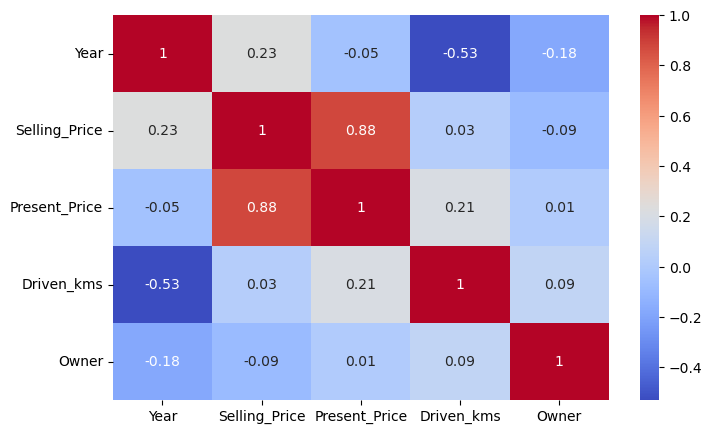

In [121]:
corr = num_data.corr().round(2)
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Dropping Car_Name

In [152]:
data = data.drop('Car_Name', axis = 1)

### Observations:
   - Selling_Price has a highly positive correlation with Present_Price .
   - Driven_kms has a highly positive correlation with Year .

### Converting categorical data into numerical

In [203]:
new_data = pd.get_dummies(data, drop_first = True )

In [204]:
new_data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


### Columns Names

In [254]:
new_data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'],
      dtype='object')

### Shape

In [155]:
new_data.shape

(299, 9)

### Describe

In [156]:
new_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478,0.193980,0.799331,0.354515,0.869565
std,2.896868,4.984240,8.566332,39015.170352,0.248720,0.396076,0.401172,0.479168,0.337346
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,1.000000,1.000000





### Information

In [157]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     299 non-null    int64  
 1   Selling_Price            299 non-null    float64
 2   Present_Price            299 non-null    float64
 3   Driven_kms               299 non-null    int64  
 4   Owner                    299 non-null    int64  
 5   Fuel_Type_Diesel         299 non-null    uint8  
 6   Fuel_Type_Petrol         299 non-null    uint8  
 7   Selling_type_Individual  299 non-null    uint8  
 8   Transmission_Manual      299 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 23.3 KB


# Building the model

### splitting data into train and test

In [205]:
train, test = train_test_split(new_data, train_size = 0.7, random_state = 100)

### shape of train and test

In [206]:
train.shape, test.shape

((209, 9), (90, 9))

### Training data

In [173]:
train.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
156,2017,0.48,0.52,15000,0,0,1,1,1
99,2010,9.65,20.45,50024,0,1,0,0,1
276,2015,8.65,13.60,24800,0,0,1,0,1
203,2011,2.95,4.60,53460,0,0,1,0,1
134,2017,0.65,0.81,11800,0,0,1,1,1


### Testing data

In [174]:
test.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
223,2015,8.25,9.40,61381,0,1,0,0,1
141,2016,0.60,0.80,20000,0,0,1,1,1
237,2015,11.25,13.60,68000,0,1,0,0,1
177,2016,0.35,0.57,24000,0,0,1,1,0
232,2015,11.45,14.79,12900,0,0,1,0,0



### Separating xtrain ytrain xtest ytest

In [207]:
ytrain = train.pop('Selling_Price')
xtrain = train

In [208]:
ytest = test.pop('Selling_Price')
xtest = test

In [177]:
ytrain

156     0.48
99      9.65
276     8.65
203     2.95
134     0.65
       ...  
67      9.25
54      2.75
80     14.73
282     8.25
8       8.75
Name: Selling_Price, Length: 209, dtype: float64

In [192]:
xtrain

,Year,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
156,2017,0.52,15000,0,0,1,1,1
99,2010,20.45,50024,0,1,0,0,1
276,2015,13.60,24800,0,0,1,0,1
203,2011,4.60,53460,0,0,1,0,1
134,2017,0.81,11800,0,0,1,1,1
...,...,...,...,...,...,...,...,...
67,2010,20.45,59000,0,1,0,0,1
54,2005,10.21,90000,0,0,1,1,1
80,2016,14.89,23000,0,1,0,0,1
282,2014,14.00,63000,0,1,0,0,1


In [179]:
ytest

223     8.25
141     0.60
237    11.25
177     0.35
232    11.45
       ...  
289    10.11
30      3.10
166     0.45
235     9.10
3       2.85
Name: Selling_Price, Length: 90, dtype: float64

In [180]:
xtest

,Year,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
223,2015,9.40,61381,0,1,0,0,1
141,2016,0.80,20000,0,0,1,1,1
237,2015,13.60,68000,0,1,0,0,1
177,2016,0.57,24000,0,0,1,1,0
232,2015,14.79,12900,0,0,1,0,0
...,...,...,...,...,...,...,...,...
289,2016,13.60,10980,0,0,1,0,1
30,2012,5.98,51439,0,1,0,0,1
166,2016,0.55,1000,0,0,1,1,1
235,2017,9.40,15141,0,0,1,0,1


### feature scaling

In [209]:
scaler = MinMaxScaler().fit(xtrain)

In [210]:
xtrain = scaler.transform(xtrain)

In [211]:
xtest = scaler.transform(xtest)

In [212]:
xtrain

array([[0.93333333, 0.00556948, 0.06823529, ..., 1.        , 1.        ,
        1.        ],
       [0.46666667, 0.56056809, 0.23305412, ..., 0.        , 0.        ,
        1.        ],
       [0.8       , 0.36981342, 0.11435294, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.86666667, 0.40573656, 0.10588235, ..., 0.        , 0.        ,
        1.        ],
       [0.73333333, 0.38095238, 0.29411765, ..., 0.        , 0.        ,
        1.        ],
       [0.86666667, 0.23865219, 0.09304941, ..., 0.        , 0.        ,
        1.        ]])

In [213]:
xtest

array([[8.00000000e-01, 2.52854358e-01, 2.86498824e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.66666667e-01, 1.33667502e-02, 9.17647059e-02, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [8.00000000e-01, 3.69813422e-01, 3.17647059e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.66666667e-01, 6.96184907e-03, 1.10588235e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.00000000e-01, 4.02951824e-01, 5.83529412e-02, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.33333333e-01, 2.45057087e-02, 1.08235294e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.33333333e-01, 1.53160679e-02, 4.94117647e-02, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.

In [214]:
train = pd.DataFrame(xtrain)
train['Selling_Price'] = ytrain

In [215]:
train

,0,1,2,3,4,5,6,7,Selling_Price
0,0.933333,0.005569,0.068235,0.0,0.0,1.0,1.0,1.0,3.35
1,0.466667,0.560568,0.233054,0.0,1.0,0.0,0.0,1.0,NaN
2,0.800000,0.369813,0.114353,0.0,0.0,1.0,0.0,1.0,7.25
3,0.533333,0.119187,0.249224,0.0,0.0,1.0,0.0,1.0,NaN
4,0.933333,0.013645,0.053176,0.0,0.0,1.0,1.0,1.0,4.60
...,...,...,...,...,...,...,...,...,...
204,0.466667,0.560568,0.275294,0.0,1.0,0.0,0.0,1.0,2.75
205,0.133333,0.275411,0.421176,0.0,0.0,1.0,1.0,1.0,5.25
206,0.866667,0.405737,0.105882,0.0,1.0,0.0,0.0,1.0,5.75
207,0.733333,0.380952,0.294118,0.0,1.0,0.0,0.0,1.0,NaN


In [221]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((209, 8), (209,), (90, 8), (90,))



### Linear Regression

In [222]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

### Getting predictions

In [224]:
lr_predictions = lr.predict(xtest)

In [225]:
lr_predictions

array([  7.01979628,   1.39644674,   9.13699583,   1.50972342,
         9.80202606,   0.96350245,   1.96293006,   4.01813016,
         1.24240952,   5.01531922,   1.35279011,   7.36584721,
         4.21033426,   5.9198132 ,  -0.38026154,   3.53730131,
         8.19838161,   5.02175311,   4.79418231,   3.61933458,
         3.49573613,   5.01896626,   0.41432989,   4.11116357,
        10.47093811,  -0.78859948,  -0.12577058,  10.30793478,
         1.56991725,   0.70776131,   6.43712316,   4.28899659,
         8.57109413,   5.30317248,   6.99349077,   0.80661649,
         3.76870016,   2.08095164,  -0.32734323,   2.30971648,
         7.18930686,   6.60339967,   9.0858371 ,   2.27709646,
         1.30722686,   4.94028616, -14.00156183,   4.17356273,
         1.75873828,   5.67404997,   5.85637043,   7.76303918,
         7.05416055,   1.98259682,   5.0646869 ,   1.93214814,
         4.0433889 ,   3.45084773,   0.95288869,   2.06639103,
         2.04705419,   4.40608505,  10.23477126,   5.02

### Train R_squared

In [242]:
lin_score = lr.score(xtrain, ytrain)
print("R-squared:", lin_score)

R-squared: 0.8881242961014986


### Test Accuracy

In [244]:
lin_accuracy = explained_variance_score(ytest, lr_predictions)
lin_accuracy = round(lin_accuracy*100, 6)
print("Linear Regressor Model Accuracy:", lin_accuracy, "%")
print()

Linear Regressor Model Accuracy: 70.793971 %



### Test R_squared

In [245]:
lin_score = lr.score(xtest, ytest)
print("R-squared:", lin_score)

R-squared: 0.7070724919800586


### Test mean_absolute_error

In [248]:
lin_mae = mean_absolute_error(ytest, lr_predictions)
print("MAE:", lin_mae)

MAE: 1.2926042197640708


### Test mean_squared_error

In [252]:
lin_mse = mean_squared_error(ytest, lr_predictions)
print("MSE:", lin_mse)

MSE: 6.53499132305661


### Test Root of mean_squared_error

In [253]:
lin_rmse =lin_mse**(1/2.0)
print("RMSE:", lin_rmse)

MSE: 2.5563629091067273
